### Задание

Самостоятельно напишите нейронную сеть, которая может стать составной частью системы бота для игры в "Крестики-нолики". Используя подготовленную базу изображений, создайте и обучите нейронную сеть, распознающую две категории изображений: крестики и нолики. Добейтесь точности распознавания более 95% (accuracy)


In [57]:
# Подключение класса для создания нейронной сети прямого распространения
from tensorflow.keras.models import Sequential 
# Подключение класса для создания полносвязного слоя
from tensorflow.keras.layers import Dense 
# Подключение оптимизатора
from tensorflow.keras.optimizers import Adam 
# Подключение утилит для to_categorical
from tensorflow.keras import utils 
# Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing import image 
# Подключение библиотеки для работы с массивами
import numpy as np
# Подключение модуля для работы с файлами
import os
# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt 
from PIL import Image 
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline 

In [58]:
# Загрузка датасета из облака
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_pro.zip', None, quiet=True)

'hw_pro.zip'

In [59]:
# Распаковываем архив hw_light.zip в папку hw_light
!unzip -q hw_pro.zip

replace hw_pro/0/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [60]:
# Путь к директории с базой
base_dir = '/content/hw_pro'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                         target_size=(img_height, img_width),
                                                         color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        else:
            y_train.append(1)
# Преобразование в numpy-массив загруженных изображений и меток классов
x_train = np.array(x_train)
y_train = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train', x_train.shape)
print('Размер массива y_train', y_train.shape)

Размер массива x_train (102, 20, 20, 1)
Размер массива y_train (102,)


In [61]:
# Используем функцию np.squeeze() чтобы изменить shape выборки

x = np.squeeze(x_train, axis=-1)
x.shape

(102, 20, 20)

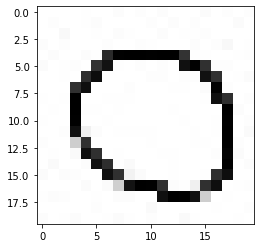

In [62]:
# Отрисовка картинки
n = np.random.randint(x.shape[0])

plt.imshow(x[n], cmap='gray')

# Вывод n-й картинки
plt.show()

In [63]:
# Проверка y_train
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [64]:
# Изменение формы входных картинок с 20х20 на 400
x_train = x.reshape(x.shape[0], -1) 

# Проверка результата
x_train.shape

(102, 400)

In [65]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

In [66]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train, 2)

In [55]:
# Проверка форрмы y_train
# 102 примеров, каждый длины 2 по числу классов
y_train.shape

(102, 2)

In [49]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(500, input_dim=400, activation='relu')) 

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(100, activation='relu'))

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(2, activation='softmax')) 

In [50]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
# Вывод структуры модели
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 500)               200500    
                                                                 
 dense_10 (Dense)            (None, 100)               50100     
                                                                 
 dense_11 (Dense)            (None, 2)                 202       
                                                                 
Total params: 250,802
Trainable params: 250,802
Non-trainable params: 0
_________________________________________________________________
None


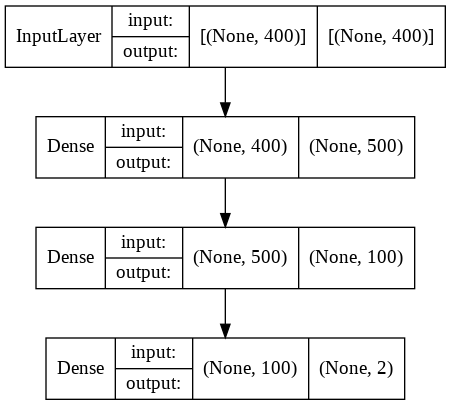

In [56]:
# Отрисовка наглядную схему (граф) нейронной сети
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

In [53]:
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=128, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=25,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)  

Epoch 1/25
1/1 [==============================] - 0s 376ms/step - loss: 1.2848 - accuracy: 0.4902
Epoch 2/25
1/1 [==============================] - 0s 15ms/step - loss: 1.5637 - accuracy: 0.5098
Epoch 3/25
1/1 [==============================] - 0s 13ms/step - loss: 1.0632 - accuracy: 0.5098
Epoch 4/25
1/1 [==============================] - 0s 10ms/step - loss: 0.6213 - accuracy: 0.7843
Epoch 5/25
1/1 [==============================] - 0s 15ms/step - loss: 0.8328 - accuracy: 0.4902
Epoch 6/25
1/1 [==============================] - 0s 10ms/step - loss: 0.7486 - accuracy: 0.4902
Epoch 7/25
1/1 [==============================] - 0s 9ms/step - loss: 0.5932 - accuracy: 0.7451
Epoch 8/25
1/1 [==============================] - 0s 11ms/step - loss: 0.6035 - accuracy: 0.5490
Epoch 9/25
1/1 [==============================] - 0s 10ms/step - loss: 0.6454 - accuracy: 0.5098
Epoch 10/25
1/1 [==============================] - 0s 8ms/step - loss: 0.5952 - accuracy: 0.5294
Epoch 11/25
1/1 [=============

In [67]:
# Сохранение модели
model.save_weights('model.h5')

# Перезапуска модели 
model.load_weights('model.h5')